## Sub-Queries 

an inner query (also called a subquery) is a query nested inside another SQL query. It's used to perform an intermediate operation whose result is then used by the outer query. Think of it as a query within a query.

In [2]:
# imports
import pandas as pd
import sqlite3

In [3]:
# connection to DB
conn = sqlite3.connect("data.sqlite")

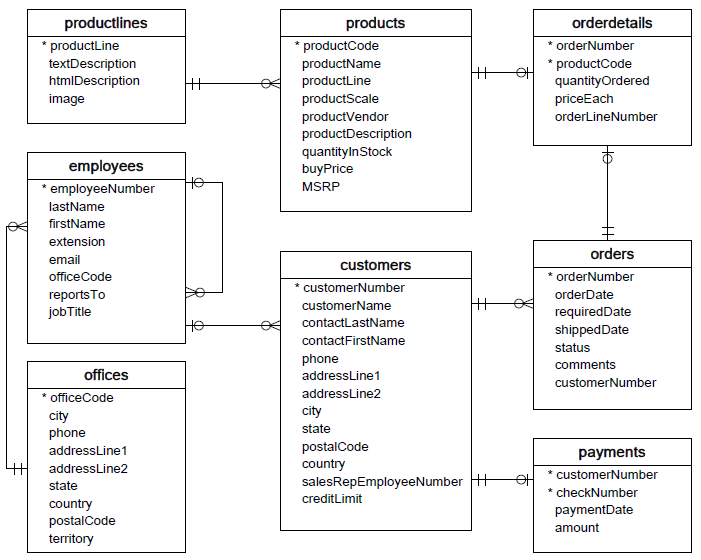

In [4]:
# example read
df = pd.read_sql("SELECT * FROM employees",conn)
df.head()

employeeNumber   lastName firstName extension  \
0           1002     Murphy     Diane     x5800   
1           1056  Patterson      Mary     x4611   
2           1076   Firrelli      Jeff     x9273   
3           1088  Patterson   William     x4871   
4           1102     Bondur    Gerard     x5408   

                             email officeCode reportsTo              jobTitle  
0     dmurphy@classicmodelcars.com          1                       President  
1   mpatterso@classicmodelcars.com          1      1002              VP Sales  
2   jfirrelli@classicmodelcars.com          1      1002          VP Marketing  
3  wpatterson@classicmodelcars.com          6      1056  Sales Manager (APAC)  
4     gbondur@classicmodelcars.com          4      1056   Sale Manager (EMEA)

### Substituting JOIN with Subqueries


An Example of a join Statement 

In [5]:
# example of using join
q = """
SELECT lastName, firstName, officeCode
FROM employees
JOIN offices
    USING(officeCode)
WHERE country = "USA"
;"""
df = pd.read_sql(q, conn)
df.head()

lastName firstName officeCode
0        Bow   Anthony          1
1   Firrelli      Jeff          1
2   Jennings    Leslie          1
3     Murphy     Diane          1
4  Patterson      Mary          1

An example of an inner query 

In [6]:
# example using inner query replacing a join 
q = """
SELECT lastName,firstName,officeCode
FROM employees
"""


## Using SQL syntax with pandasql

pandasql is a Python library that lets you run SQL queries on pandas DataFrames using SQLite syntax. It’s super handy if you’re comfortable with SQL and want to query your data in a more familiar way rather than using pandas syntax (like .groupby(), .merge(), etc.).

In [7]:
# ! pip install pandasql

In [8]:
# import pandasql
from pandasql import sqldf

In [9]:
# lambda fuction adding globals

pysqldf = lambda q:sqldf(q,globals())


In [10]:
# simple select example
q = """
SELECT * FROM employees 
"""
employees_df = pd.read_sql(q,conn)

In [11]:
# example 2
q = "SELECT firstName,lastName,jobTitle FROM employees_df"
pysqldf(q).head()

firstName   lastName              jobTitle
0     Diane     Murphy             President
1      Mary  Patterson              VP Sales
2      Jeff   Firrelli          VP Marketing
3   William  Patterson  Sales Manager (APAC)
4    Gerard     Bondur   Sale Manager (EMEA)

## SQL Practice

### Level 1: Basics

1. **List all Products**

In [12]:
# list all products
q = """
SELECT * FROM products;

"""
pd.read_sql(q,conn)

productCode                            productName   productLine  \
0      S10_1678  1969 Harley Davidson Ultimate Chopper   Motorcycles   
1      S10_1949               1952 Alpine Renault 1300  Classic Cars   
2      S10_2016                  1996 Moto Guzzi 1100i   Motorcycles   
3      S10_4698   2003 Harley-Davidson Eagle Drag Bike   Motorcycles   
4      S10_4757                    1972 Alfa Romeo GTA  Classic Cars   
..          ...                                    ...           ...   
105   S700_3505                            The Titanic         Ships   
106   S700_3962                         The Queen Mary         Ships   
107   S700_4002              American Airlines: MD-11S        Planes   
108    S72_1253                       Boeing X-32A JSF        Planes   
109    S72_3212                             Pont Yacht         Ships   

    productScale              productVendor  \
0           1:10            Min Lin Diecast   
1           1:10    Classic Metal Creations   
2           1:10   Highway 66 Mini Classics   
3           1:10          Red Start Diecast   
4           1:10    Motor City Art Classics   
..           ...                        ...   
105        1:700   Carousel DieCast Legends   
106        1:700  Welly Diecast Productions   
107        1:700        Second Gear Diecast   
108         1:72    Motor City Art Classics   
109         1:72       Unimax Art Galleries   

                                    productDescription quantityInStock  \
0    This replica features working kickstand, front...            7933   
1    Turnable front wheels; steering function; deta...            7305   
2    Official Moto Guzzi logos and insignias, saddl...            6625   
3    Model features, official Harley Davidson logos...            5582   
4    Features include: Turnable front wheels; steer...            3252   
..                                                 ...             ...   
105  Completed model measures 19 1/2 inches long, 9...            1956   
106  Exact replica. Wood and Metal. Many extras inc...            5088   
107  Polished finish. Exact replia with official lo...            8820   
108  10" Wingspan with retractable landing gears.Co...            4857   
109  Measures 38 inches Long x 33 3/4 inches High. ...             414   

    buyPrice    MSRP  
0      48.81   95.70  
1      98.58  214.30  
2      68.99  118.94  
3      91.02  193.66  
4      85.68  136.00  
..       ...     ...  
105    51.09  100.17  
106    53.63   99.31  
107    36.27   74.03  
108    32.77   49.66  
109    33.30   54.60  

[110 rows x 9 columns]

2. **Show All Customers in USA**

In [13]:
# Show All Customers in USA
q = """
SELECT customerName, city, state FROM customers WHERE country = 'USA';
"""

pd.read_sql(q,conn)

customerName           city state
0             Signal Gift Stores      Las Vegas    NV
1   Mini Gifts Distributors Ltd.     San Rafael    CA
2                Mini Wheels Co.  San Francisco    CA
3              Land of Toys Inc.            NYC    NY
4             Muscle Machine Inc            NYC    NY
5          Diecast Classics Inc.      Allentown    PA
6           Technics Stores Inc.     Burlingame    CA
7         American Souvenirs Inc      New Haven    CT
8     Cambridge Collectables Co.      Cambridge    MA
9                Gift Depot Inc.    Bridgewater    CT
10               Vitachrome Inc.            NYC    NY
11       Auto-Moto Classics Inc.     Brickhaven    MA
12      Online Mini Collectables     Brickhaven    MA
13             Toys4GrownUps.com       Pasadena    CA
14             Boards & Toys Co.       Glendale    CA
15  Collectable Mini Designs Co.      San Diego    CA
16          Marta's Replicas Co.      Cambridge    MA
17                 Mini Classics   White Plains    NY
18           Mini Creations Ltd.    New Bedford    MA
19      Corporate Gift Ideas Co.  San Francisco    CA
20       Tekni Collectables Inc.         Newark    NJ
21       Classic Gift Ideas, Inc   Philadelphia    PA
22    Men 'R' US Retailers, Ltd.    Los Angeles    CA
23             Gifts4AllAges.com         Boston    MA
24  Online Diecast Creations Co.         Nashua    NH
25    Collectables For Less Inc.     Brickhaven    MA
26          Classic Legends Inc.            NYC    NY
27              Gift Ideas Corp.       Glendale    CT
28     The Sharp Gifts Warehouse       San Jose    CA
29              Super Scale Inc.      New Haven    CT
30               Microscale Inc.            NYC    NY
31              FunGiftIdeas.com    New Bedford    MA
32   West Coast Collectables Co.        Burbank    CA
33  Motor Mint Distributors Inc.   Philadelphia    PA
34      Signal Collectibles Ltd.       Brisbane    CA
35          Diecast Collectables         Boston    MA

3. **List the names and email addresses of all employees.**

In [14]:
# List the names and email addresses of all employees.
q = """
SELECT firstName, lastName, email FROM employees;

"""

pd.read_sql(q,conn)

firstName   lastName                            email
0      Diane     Murphy     dmurphy@classicmodelcars.com
1       Mary  Patterson   mpatterso@classicmodelcars.com
2       Jeff   Firrelli   jfirrelli@classicmodelcars.com
3    William  Patterson  wpatterson@classicmodelcars.com
4     Gerard     Bondur     gbondur@classicmodelcars.com
5    Anthony        Bow        abow@classicmodelcars.com
6     Leslie   Jennings   ljennings@classicmodelcars.com
7     Leslie   Thompson   lthompson@classicmodelcars.com
8      Julie   Firrelli   jfirrelli@classicmodelcars.com
9      Steve  Patterson  spatterson@classicmodelcars.com
10  Foon Yue      Tseng      ftseng@classicmodelcars.com
11    George     Vanauf     gvanauf@classicmodelcars.com
12      Loui     Bondur     lbondur@classicmodelcars.com
13    Gerard  Hernandez   ghernande@classicmodelcars.com
14    Pamela   Castillo   pcastillo@classicmodelcars.com
15     Larry       Bott       lbott@classicmodelcars.com
16     Barry      Jones      bjones@classicmodelcars.com
17      Andy     Fixter     afixter@classicmodelcars.com
18     Peter      Marsh      pmarsh@classicmodelcars.com
19       Tom       King       tking@classicmodelcars.com
20      Mami      Nishi      mnishi@classicmodelcars.com
21   Yoshimi       Kato       ykato@classicmodelcars.com
22    Martin     Gerard     mgerard@classicmodelcars.com

4. **Retrieve the office codes and cities of all offices.**

In [15]:
# Retrieve the office codes and cities of all offices.
q = """
SELECT officeCode, city FROM offices
"""

pd.read_sql(q,conn)

officeCode           city
0          1  San Francisco
1          2         Boston
2          3            NYC
3          4          Paris
4          5          Tokyo
5          6         Sydney
6          7         London

### Level 2: Joins & Filtering

5. **Find all orders placed by customers in France.**

In [16]:
# Find all orders placed by customers in France.
q = """
SELECT o.orderNumber, o.orderDate, c.customerName  
FROM orders o  
JOIN customers c ON o.customerNumber = c.customerNumber  
WHERE c.country = 'France';
"""
pd.read_sql(q,conn)

orderNumber   orderDate               customerName
0        10123  2003-05-20          Atelier graphique
1        10298  2004-09-27          Atelier graphique
2        10345  2004-11-25          Atelier graphique
3        10275  2004-07-23          La Rochelle Gifts
4        10315  2004-10-29          La Rochelle Gifts
5        10375  2005-02-03          La Rochelle Gifts
6        10425  2005-05-31          La Rochelle Gifts
7        10194  2003-11-25     Saveley & Henriot, Co.
8        10208  2004-01-02     Saveley & Henriot, Co.
9        10227  2004-03-02     Saveley & Henriot, Co.
10       10180  2003-11-11   Daedalus Designs Imports
11       10224  2004-02-21   Daedalus Designs Imports
12       10114  2003-04-01  La Corne D'abondance, Co.
13       10286  2004-08-28  La Corne D'abondance, Co.
14       10336  2004-11-20  La Corne D'abondance, Co.
15       10241  2004-04-13                Mini Caravy
16       10255  2004-06-04                Mini Caravy
17       10405  2005-04-14                Mini Caravy
18       10136  2003-07-04               Alpha Cognac
19       10178  2003-11-08               Alpha Cognac
20       10397  2005-03-28               Alpha Cognac
21       10134  2003-07-01            Lyon Souveniers
22       10356  2004-12-09            Lyon Souveniers
23       10395  2005-03-17            Lyon Souveniers
24       10216  2004-02-02       Auto Associés & Cie.
25       10304  2004-10-11       Auto Associés & Cie.
26       10122  2003-05-08       Marseille Mini Autos
27       10344  2004-11-25       Marseille Mini Autos
28       10364  2005-01-06       Marseille Mini Autos
29       10121  2003-05-07         Reims Collectables
30       10137  2003-07-10         Reims Collectables
31       10343  2004-11-24         Reims Collectables
32       10359  2004-12-15         Reims Collectables
33       10398  2005-03-30         Reims Collectables
34       10211  2004-01-15          Auto Canal+ Petit
35       10252  2004-05-26          Auto Canal+ Petit
36       10402  2005-04-07          Auto Canal+ Petit

6. **List product names and quantities ordered in each order.**

In [17]:
# List product names and quantities ordered in each order.
q = """
SELECT p.productName, od.quantityOrdered  
FROM orderdetails od  
JOIN products p ON od.productCode = p.productCode;
"""

pd.read_sql(q,conn)

productName quantityOrdered
0                1917 Grand Touring Sedan              30
1                      1911 Ford Town Car              50
2     1932 Alfa Romeo 8C2300 Spider Sport              22
3        1936 Mercedes Benz 500k Roadster              49
4               1932 Model A Ford J-Coupe              25
...                                   ...             ...
2991             1962 Volkswagen Microbus              49
2992  1958 Chevy Corvette Limited Edition              31
2993          1980’s GM Manhattan Express              41
2994          1954 Greyhound Scenicruiser              11
2995     Diamond T620 Semi-Skirted Tanker              18

[2996 rows x 2 columns]

7. **Get a list of all employees and the names of the customers they support.**

In [18]:
# Get a list of all employees and the names of the customers they support.

q = """
SELECT e.firstName || ' ' || e.lastName AS employeeName, c.customerName  
FROM employees e  
JOIN customers c ON e.employeeNumber = c.salesRepEmployeeNumber;
"""

pd.read_sql(q,conn)

employeeName                  customerName
0   Leslie Jennings      Corporate Gift Ideas Co.
1   Leslie Jennings  Mini Gifts Distributors Ltd.
2   Leslie Jennings               Mini Wheels Co.
3   Leslie Jennings      Signal Collectibles Ltd.
4   Leslie Jennings          Technics Stores Inc.
..              ...                           ...
95    Martin Gerard    Corrida Auto Replicas, Ltd
96    Martin Gerard            Enaco Distributors
97    Martin Gerard    Iberia Gift Imports, Corp.
98    Martin Gerard         Precious Collectables
99    Martin Gerard               Vida Sport, Ltd

[100 rows x 2 columns]

### Level 3: Aggregations & Grouping

8. **Count how many orders each customer has made.**

In [19]:
# Count how many orders each customer has made.
q = """
SELECT c.customerName, COUNT(o.orderNumber) AS orderCount  
FROM customers c  
JOIN orders o ON c.customerNumber = o.customerNumber  
GROUP BY c.customerNumber;
"""

pd.read_sql(q,conn)


customerName  orderCount
0                Atelier graphique           3
1               Signal Gift Stores           3
2       Australian Collectors, Co.           5
3                La Rochelle Gifts           4
4               Baane Mini Imports           4
..                             ...         ...
93    Motor Mint Distributors Inc.           3
94        Signal Collectibles Ltd.           2
95  Double Decker Gift Stores, Ltd           2
96            Diecast Collectables           2
97               Kelly's Gift Shop           4

[98 rows x 2 columns]

9. **Find the total amount ordered per order (quantity * price).**

In [20]:
# Find the total amount ordered per order (quantity * price).
q = """
SELECT orderNumber, SUM(quantityOrdered * priceEach) AS totalAmount  
FROM orderdetails  
GROUP BY orderNumber;
"""

pd.read_sql(q,conn)

orderNumber  totalAmount
0         10100     10223.83
1         10101     10549.01
2         10102      5494.78
3         10103     50218.95
4         10104     40206.20
..          ...          ...
321       10421      7639.10
322       10422      5849.44
323       10423      8597.73
324       10424     29310.30
325       10425     41623.44

[326 rows x 2 columns]

10. **Get the number of employees in each office.**

In [21]:
# Get the number of employees in each office.
q = """ 
SELECT officeCode, COUNT(*) AS employeeCount  
FROM employees  
GROUP BY officeCode;
"""

pd.read_sql(q,conn)

officeCode  employeeCount
0          1              6
1          2              2
2          3              2
3          4              5
4          5              2
5          6              4
6          7              2

###  Level 4: Subqueries & Advanced SQL

11. **List all customers who have not made any payments.**

In [22]:
# List all customers who have not made any payments.
q = """ 
SELECT customerName  
FROM customers  
WHERE customerNumber NOT IN (SELECT DISTINCT customerNumber FROM payments);
"""

pd.read_sql(q,conn)

customerName
0               Havel & Zbyszek Co
1           American Souvenirs Inc
2                Porto Imports Co.
3       Asian Shopping Network, Co
4                  Natürlich Autos
5                    ANG Resellers
6         Messner Shopping Network
7                Franken Gifts, Co
8                BG&E Collectables
9                 Schuyler Imports
10                Der Hund Imports
11       Cramer Spezialitäten, Ltd
12           Asian Treasures, Inc.
13            SAR Distributors, Co
14                 Kommission Auto
15          Lisboa Souveniers, Inc
16           Precious Collectables
17  Stuttgart Collectable Exchange
18        Feuer Online Stores, Inc
19                Warburg Exchange
20             Anton Designs, Ltd.
21             Mit Vergnügen & Co.
22       Kremlin Collectables, Co.
23              Raanan Stores, Inc

12. **Find the top 5 most ordered products by quantity.**

In [23]:
# Find the top 5 most ordered products by quantity.
q = """ 
SELECT p.productName, SUM(od.quantityOrdered) AS totalQuantity  
FROM products p  
JOIN orderdetails od ON p.productCode = od.productCode  
GROUP BY p.productCode  
ORDER BY totalQuantity DESC  
LIMIT 5;
"""

pd.read_sql(q,conn)

productName  totalQuantity
0              1992 Ferrari 360 Spider red           1808
1                     1937 Lincoln Berline           1111
2                American Airlines: MD-11S           1085
3  1941 Chevrolet Special Deluxe Cabriolet           1076
4             1930 Buick Marquette Phaeton           1074

13. **Find employees who report to the same manager.**

In [24]:
# Find employees who report to the same manager
q = """ 
SELECT e1.firstName || ' ' || e1.lastName AS employee,  
       e2.firstName || ' ' || e2.lastName AS manager  
FROM employees e1  
JOIN employees e2 ON e1.reportsTo = e2.employeeNumber;
"""

pd.read_sql(q,conn)

employee            manager
0      Mary Patterson       Diane Murphy
1       Jeff Firrelli       Diane Murphy
2   William Patterson     Mary Patterson
3       Gerard Bondur     Mary Patterson
4         Anthony Bow     Mary Patterson
5     Leslie Jennings        Anthony Bow
6     Leslie Thompson        Anthony Bow
7      Julie Firrelli        Anthony Bow
8     Steve Patterson        Anthony Bow
9      Foon Yue Tseng        Anthony Bow
10      George Vanauf        Anthony Bow
11        Loui Bondur      Gerard Bondur
12   Gerard Hernandez      Gerard Bondur
13    Pamela Castillo      Gerard Bondur
14         Larry Bott      Gerard Bondur
15        Barry Jones      Gerard Bondur
16        Andy Fixter  William Patterson
17        Peter Marsh  William Patterson
18           Tom King  William Patterson
19         Mami Nishi     Mary Patterson
20       Yoshimi Kato         Mami Nishi
21      Martin Gerard      Gerard Bondur